     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
5  5.4  3.9  1.7  0.4
6  4.6  3.4  1.4  0.3
7  5.0  3.4  1.5  0.2
8  4.4  2.9  1.4  0.2
9  4.9  3.1  1.5  0.1
(150, 3)


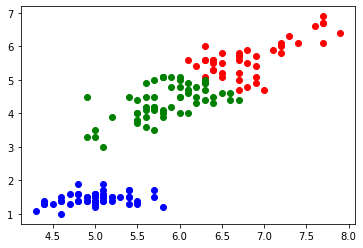

Centroid of cluster  0
:  [6.83571429 3.06428571 5.6547619 ]


Centroid of cluster  1
:  [5.84655172 2.73275862 4.3637931 ]


Centroid of cluster  2
:  [5.006 3.428 1.462]




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Calculate_New_Centroids(x_data, total_clusters, prev_centroids):
    clusters= [[] for i in range(total_clusters)]  
    
    for idx, point in enumerate(x_data):
        nearest_centroid= np.argmin(np.sqrt(np.sum((prev_centroids-point)**2, axis=1)))
        clusters[nearest_centroid].append(idx)
        
    new_centroids=np.zeros((total_clusters, len(x_data[0])))
    for idx, cluster_points in enumerate(clusters):
        new_centroids[idx]= np.mean(x_data[cluster_points], axis=0)
    
    return  (clusters,new_centroids)

def plot_clusters(x_data, clusters):
    colors=['red', 'green', 'blue', 'black', 'orange', 'pink']
    
    for idx, cluster_point in enumerate(clusters): 
        for point in cluster_point:
            plt.scatter(x_data[point, 0], x_data[point, 2], color= colors[idx])
    
    plt.show()
    
def KMeansClustering(x_data, total_clusters, Max_iterations= 100):
    centroids= np.zeros((total_clusters, len(x_data[0])))
    
    for i in range(total_clusters):
        centroids[i]= x_data[i]
    centroids= np.array(centroids)
    
    for j in range(Max_iterations):
        clusters, new_centroids= Calculate_New_Centroids(x_data, total_clusters, centroids)
        
        diff= np.sqrt(np.sum(np.sum((new_centroids-centroids)**2, axis=1)))
        
        if diff==0:
            break
        centroids= new_centroids
    
    plot_clusters(x_data, clusters)
    return centroids

from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(iris.data)
print(dataset.head(10))
x= np.array(dataset.iloc[:,:-1])
print(x.shape)
clusters_count=3
cluster_centroid= KMeansClustering(x, clusters_count)

for idx, point in enumerate(cluster_centroid):
    print("Centroid of cluster ", idx)
    print(": ", point);
    print("\n")